# Data analytics 2

# Contents page

A.  <a href='#section1'>Part 1 - Obama Clinton</a> 
 1. The problem <br />
  1.2. Subproblem: Electorate Segmentation Research
   - <a href='#section1.2.'>Correlations with Obama's win</a>
 2. Understand the data <br />
  2.1.  - <a href='#section2.1.'>Nature, size and source of the data</a> <br />
    2.2.2.2. <a href='#section2.2.2.2.'>Ethnicity</a>  <br />
    2.2.2.3. <a href='#section2.2.2.3.'>Age</a>  <br/>
   2.3. <a href='#section2.3.'>Correlation between variables</a> 
 3. Data pre-processing <br/>
   3.1.2. Data manipulation: R
    - <a href='#section3.1.2.1.'>Create target variable for Obama's likelihood to win</a> 
    -  <a href='#section3.1.2.2.'>Imputting missing values</a> 
    - <a href='#section3.1.2.3.'>Convert data type</a> 
    - <a href='#section3.1.2.3.'>Create known and unknown vote datasets</a>  <br/>
  3.2.  <a href='#section3.2.'>Data splitting: R</a> 
 4. Generate and test prediction models <br/>
 4.1. Prediction models <br/>
  4.1.1. <a href='#section4.1.1.'>Linear Regression</a>  <br/>
  4.1.2. <a href='#section4.1.2.'>Backwards stepwise</a> <br/>
  4.1.1. <a href='#section4.1.3.'>Classification tree</a> <br/>
 4.2. <a href='#section4.2.'>Best prediction model</a> <br/>
 5. <a href='#section5'>Problem Conclusion and recommendations</a>  <br/>

B.  <a href='#section2'>Part 2 - Nicu</a> <br/>

C. <a href='#section3'>Appendix</a> 


<a id='section1'></a>
# Part 1 - Obama Clinton

In [133]:
#Read the file
elect.df <- read.csv('Obama.csv')

## Section 3 : Data pre-processing

### 3.1.2. Data manipulation: R
<a id='section3.1.2.1.'></a>

In [134]:
#Creating the ObamaWin columns both numerical and categorical


for (row in 1:nrow(elect.df)) {
     Obamav <- elect.df[row, "Obama"]
     Clintonv<- elect.df[row, "Clinton"]
    if(is.na(Obamav))
        {elect.df[row,"ObamaWin"]<-NA
         elect.df[row,"ObamaWinNr"]<-NA
        }
    else if(Obamav>Clintonv)
        {elect.df[row,"ObamaWin"]<-"Win"
        elect.df[row,"ObamaWinNr"]<-1}
    else 
        {elect.df[row,"ObamaWinNr"]<-0
        elect.df[row,"ObamaWin"]<-"Lose"}
        }

In [135]:
elect.df

County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,⋯,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaWin,ObamaWinNr
Adair,IA,Midwest,19001,1/3/2008,Caucuses,75,22,24,96.7,⋯,90,1145,75.0,66.0,7714,13.5,570,373,Win,1
Adams,IA,Midwest,19003,1/3/2008,Caucuses,50,18,7,96.8,⋯,78,1829,74.7,65.4,4192,9.9,425,238,Lose,0
Allamakee,IA,Midwest,19005,1/3/2008,Caucuses,80,25,33,104.5,⋯,186,1265,76.4,64.1,14796,23.1,659,326,Win,1
Appanoose,IA,Midwest,19007,1/3/2008,Caucuses,60,17,10,94.0,⋯,453,3315,74.0,60.2,13422,27.0,516,236,Lose,0
Audubon,IA,Midwest,19009,1/3/2008,Caucuses,48,16,17,94.7,⋯,79,1223,79.2,70.4,6278,14.2,444,261,Win,1
Benton,IA,Midwest,19011,1/3/2008,Caucuses,80,23,23,98.4,⋯,269,996,79.4,60.8,26962,37.6,718,401,Lose,0
Black Hawk,IA,Midwest,19013,1/3/2008,Caucuses,420,117,179,92.7,⋯,2835,2252,68.9,54.5,126106,222.4,572,275,Win,1
Boone,IA,Midwest,19015,1/3/2008,Caucuses,140,49,43,95.9,⋯,359,1350,75.8,60.6,26584,46.5,574,313,Lose,0
Bremer,IA,Midwest,19017,1/3/2008,Caucuses,100,28,35,93.5,⋯,170,718,78.2,62.0,23837,54.4,440,255,Win,1
Buchanan,IA,Midwest,19019,1/3/2008,Caucuses,150,47,53,98.9,⋯,277,1318,78.2,62.9,21045,36.8,573,340,Win,1


<a id='section2.1.'></a>
### 2.1. Nature, size, source of the data

In [136]:
summary(elect.df[,3:42]) 

       Region          FIPS          ElectionDate    ElectionType 
 Midwest  : 814   Min.   : 1001   2/5/2008 :1128   Caucuses: 310  
 Northeast: 217   1st Qu.:18102   3/4/2008 : 358   Primary :2558  
 South    :1419   Median :30110   2/9/2008 : 196                  
 West     : 418   Mean   :31029   5/6/2008 : 192                  
                  3rd Qu.:46124   2/12/2008: 158                  
                  Max.   :56045   5/20/2008: 156                  
                                  (Other)  : 680                  
   TotalVote          Clinton           Obama        MalesPer100Females
 Min.   :     13   Min.   :     4   Min.   :     4   Min.   : 76.20    
 1st Qu.:    732   1st Qu.:   329   1st Qu.:   254   1st Qu.: 94.90    
 Median :   2330   Median :  1106   Median :   878   Median : 97.60    
 Mean   :  12864   Mean   :  5974   Mean   :  6178   Mean   : 99.08    
 3rd Qu.:   6418   3rd Qu.:  3200   3rd Qu.:  2749   3rd Qu.:100.50    
 Max.   :1413869   Max.   :77170

In [137]:
unique(elect.df[c("Region")])

,Region
1,Midwest
100,Northeast
110,West
127,South


### 1.2. Subproblem: Electorate segmentation reserach
<a id='section1.2.'></a>
#### Correlations with ObamaWin


In [138]:
#top 10 correlated attributes with Obama's victory


targetCol <- which(names(elect.df)=="ObamaWinNr") 
startCol <- which(names(elect.df)=="MalesPer100Females") 
endCol <- which(names(elect.df)=="FarmArea")

cor.ObamaWin <- cor(elect.df[,c(targetCol, startCol:endCol)]
                     ,use="complete.obs")[-1,"ObamaWinNr"]

cor.ObamaWin.df <- data.frame(cor=cor.ObamaWin, abs.cor=abs(cor.ObamaWin), 
                               row.names=names(cor.ObamaWin))

cor.ObamaWin.df <- cor.ObamaWin.df[order(-cor.ObamaWin.df$abs.cor),]

cor.ObamaWin.df[1:10,]

,cor,abs.cor
Black,0.3376574,0.3376574
White,-0.2958959,0.2958959
Bachelors,0.2696747,0.2696747
SocialSecurityRate,-0.2692112,0.2692112
MedicareRate,-0.2411597,0.2411597
Age65andAbove,-0.2182512,0.2182512
HighSchool,0.2105106,0.2105106
IncomeAbove75K,0.2103824,0.2103824
MedianIncome,0.1871499,0.1871499
AgeBelow35,0.1735508,0.1735508


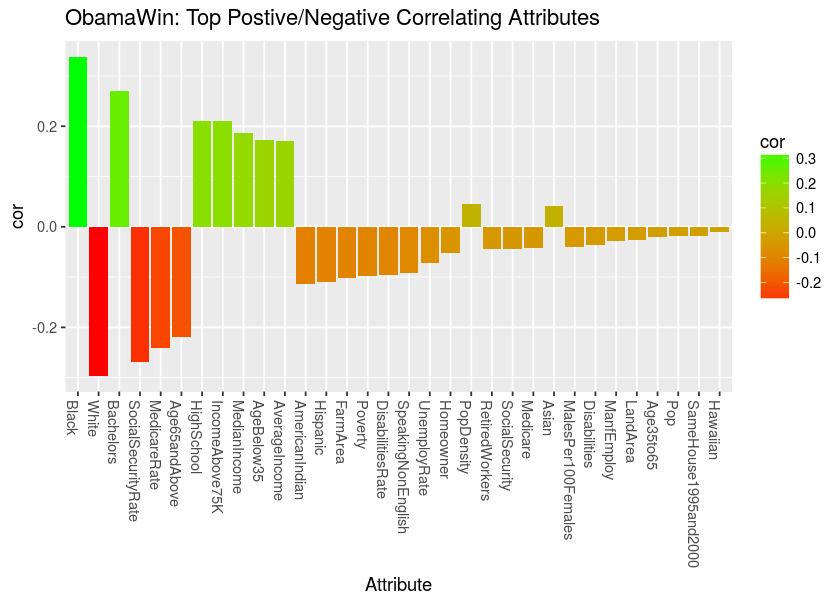

In [139]:
#Top correlated attributes with Obama's victory


options(repr.plot.height=5)

library(ggplot2)

ggplot(cor.ObamaWin.df, aes(x=reorder(row.names(cor.ObamaWin.df),-abs.cor), y=cor, fill=cor)) +
    geom_col() + ggtitle("ObamaWin: Top Postive/Negative Correlating Attributes") + xlab("Attribute") +
    scale_fill_gradient(low="red", high="green") +
    theme(axis.text.x=element_text(angle=-90, hjust=0))

<a id='section2.3.'></a>
### 2.3. Correlations between variables


#### Correlations between top correlated attributes with ObamaWin

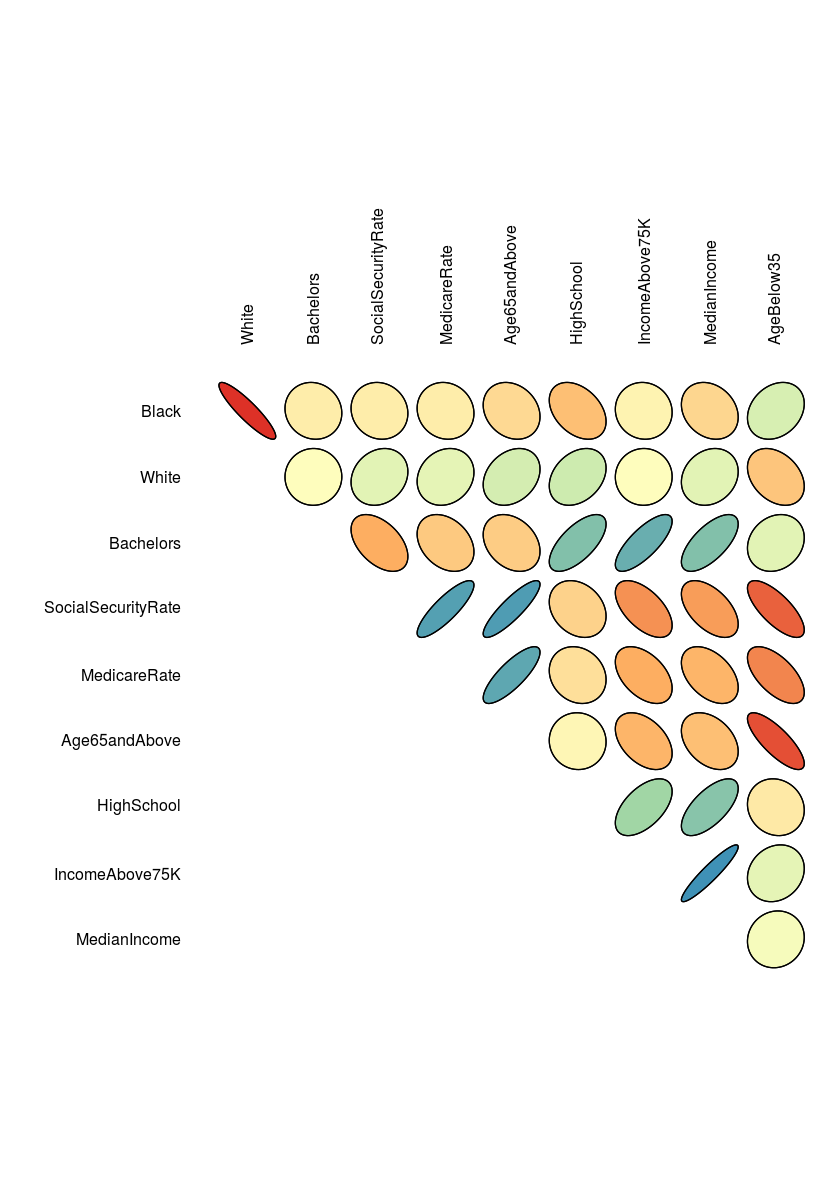

In [140]:

library (ellipse); library (RColorBrewer); options(repr.plot.height=10)
my_colors=colorRampPalette(brewer.pal(5, "Spectral"))(100)
data=cor(elect.df[,c("Black", "White", "Bachelors", "SocialSecurityRate",
               "MedicareRate", "Age65andAbove", "HighSchool", "IncomeAbove75K",
               "MedianIncome", "AgeBelow35")], use="complete.obs")

plotcorr(data, col=my_colors[data*50+50], mar=c(0,0,0,0),
        cex.lab=0.8, type="upper", diag=FALSE)


### 3.2.1.Data manipulation: R
<a id='section3.1.2.2.'></a>
#### Imputting missing values

In [141]:
#check missing values
countNAs <- function (v) sum(ifelse(is.na(v),1,0))

elect.countNAs <- sapply(elect.df, countNAs)

elect.countNAs[elect.countNAs != 0]
    

TotalVote              Clinton                Obama 
                1131                 1131                 1131 
               Black                Asian       AmericanIndian 
                  80                   94                   99 
          HighSchool            Bachelors              Poverty 
                   1                    1                    1 
      IncomeAbove75K         MedianIncome        AverageIncome 
                   2                    1                   30 
        UnemployRate           ManfEmploy   SpeakingNonEnglish 
                   1                  293                    1 
            Medicare         MedicareRate       SocialSecurity 
                   1                    1                    1 
  SocialSecurityRate       RetiredWorkers         Disabilities 
                   1                    1                    8 
    DisabilitiesRate            Homeowner SameHouse1995and2000 
                   8                    2                    1 
            LandArea             FarmArea             ObamaWin 
                   1                   87                 1131 
          ObamaWinNr 
                1131

In [142]:
# Imputing missing values:
# Missing values for AverageIncome are replaced by the MedianIncome for that same record

elect.df$AverageIncome <- ifelse(is.na(elect.df$AverageIncome), 
                                 elect.df$MedianIncome, 
                                 
                                 elect.df$AverageIncome)

In [143]:
# Missing values for the following list of attributes are replaced by 0.
     
for (attr in c("Black","Asian","AmericanIndian","ManfEmploy",
               "Disabilities","DisabilitiesRate","FarmArea"))
    {elect.df[[attr]] <- ifelse(is.na(elect.df[[attr]]), 
                                 0, 
                                 elect.df[[attr]])}

In [144]:
countNAs <- function (v) sum(ifelse(is.na(v),1,0))

elect.countNAs <- sapply(elect.df, countNAs)

elect.countNAs[elect.countNAs != 0]

TotalVote              Clinton                Obama 
                1131                 1131                 1131 
          HighSchool            Bachelors              Poverty 
                   1                    1                    1 
      IncomeAbove75K         MedianIncome        AverageIncome 
                   2                    1                    1 
        UnemployRate   SpeakingNonEnglish             Medicare 
                   1                    1                    1 
        MedicareRate       SocialSecurity   SocialSecurityRate 
                   1                    1                    1 
      RetiredWorkers            Homeowner SameHouse1995and2000 
                   1                    2                    1 
            LandArea             ObamaWin           ObamaWinNr 
                   1                 1131                 1131

In [145]:
# There still remain several attributes with 1 or 2 missing values. 
# It turns out that all these final missing values are in 2 records.$$
# The following codes removes these records entirely.

elect.df <- elect.df[is.na(elect.df$HighSchool)==FALSE,]
elect.df <- elect.df[is.na(elect.df$Poverty)==FALSE,]

In [146]:
countNAs <- function (v) sum(ifelse(is.na(v),1,0))

elect.countNAs <- sapply(elect.df, countNAs)

elect.countNAs[elect.countNAs != 0]

# We now see that all the missing data has addressed.

TotalVote    Clinton      Obama   ObamaWin ObamaWinNr 
      1130       1130       1130       1130       1130

<a id='section3.1.2.3.'></a>
### Covert data type

In [147]:

elect.df$ElectionDate <- as.Date(elect.df$ElectionDate, 
                                 format="%m/%d/%Y")
elect.df$ElectionDate

[1] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
   [6] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [11] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [16] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [21] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [26] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [31] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [36] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [41] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [46] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [51] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [56] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [61] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [66] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [71] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [76] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [81] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [86] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [91] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03"
  [96] "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-03" "2008-01-08"
 [101] "2008-01-08" "2008-01-08" "2008-01-08" "2008-01-08" "2008-01-08"
 [106] "2008-01-08" "2008-01-08" "2008-01-08" "2008-01-08" "2008-01-19"
 [111] "2008-01-19" "2008-01-19" "2008-01-19" "2008-01-19" "2008-01-19"
 [116] "2008-01-19" "2008-01-19" "2008-01-19" "2008-01-19" "2008-01-19"
 [121] "2008-01-19" "2008-01-19" "2008-01-19" "2008-01-19" "2008-01-19"
 [126] "2008-01-19" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [131] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [136] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [141] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [146] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [151] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [156] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [161] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [166] "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26" "2008-01-26"
 [171] "2008-01-26" "2008-01-26" "2008-01-29" "2008-01-29" "2008-01-29"
 [176] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [181] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [186] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [191] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [196] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [201] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [206] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [211] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [216] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [221] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [226] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [231] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29"
 [236] "2008-01-29" "2008-01-29" "2008-01-29" "2008-01-29" "2008-02-05"
 [241] "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05"
 [246] "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05"
 [251] "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05"
 [256] "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05"
 [261] "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05"
 [266] "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05"
 [271] "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05" "2008-02-05"
 [276] "2008-02-05" "2008-02-05" "2008-02-0

<a id='section3.1.2.3.'></a>
### Create known and unknown vote datasets

In [148]:

elect.df.known <- elect.df[elect.df$ElectionDate < 
                           as.Date("2/19/2008", format = "%m/%d/%Y"), ]

elect.df.unknown <- elect.df[elect.df$ElectionDate >= 
                             as.Date("2/19/2008", format = "%m/%d/%Y"), ]

In [149]:
# We can now see now many rows there are in our known 
# and unknown datasets

nrow(elect.df.known)
nrow(elect.df.unknown)

[1] 1736

[1] 1130

## Section 2 

### 2.2.2. Studying the relevant data attributes

<a id='section2.2.2.2.'></a>
#### 2.2.2.2. Ethnicity

In [150]:
data1<-elect.df.known[elect.df.known$ObamaWin=="Win",]

data2<-elect.df.known[elect.df.known$ObamaWin=="Lose",]

In [151]:
d1<-aggregate(data.frame(Nr_Obama_Wins = data1$ElectionDate), list(ElectionDate = data1$ElectionDate), length)

In [152]:
d2<-aggregate(data.frame(Nr_Clinton_Wins = data2$ElectionDate), list(ElectionDate = data2$ElectionDate), length)

In [153]:
#created a table that counts each candidate's number of wins in each election date

d3<-merge(d1,d2,by="ElectionDate")
d3

ElectionDate,Nr_Obama_Wins,Nr_Clinton_Wins
2008-01-03,51,48
2008-01-08,5,5
2008-01-19,11,6
2008-01-26,44,2
2008-01-29,9,58
2008-02-05,478,649
2008-02-09,97,99
2008-02-10,12,4
2008-02-12,116,42


In [154]:

d3m <- reshape2::melt(d3, id.var='ElectionDate')
d3m

ElectionDate,variable,value
2008-01-03,Nr_Obama_Wins,51
2008-01-08,Nr_Obama_Wins,5
2008-01-19,Nr_Obama_Wins,11
2008-01-26,Nr_Obama_Wins,44
2008-01-29,Nr_Obama_Wins,9
2008-02-05,Nr_Obama_Wins,478
2008-02-09,Nr_Obama_Wins,97
2008-02-10,Nr_Obama_Wins,12
2008-02-12,Nr_Obama_Wins,116
2008-01-03,Nr_Clinton_Wins,48


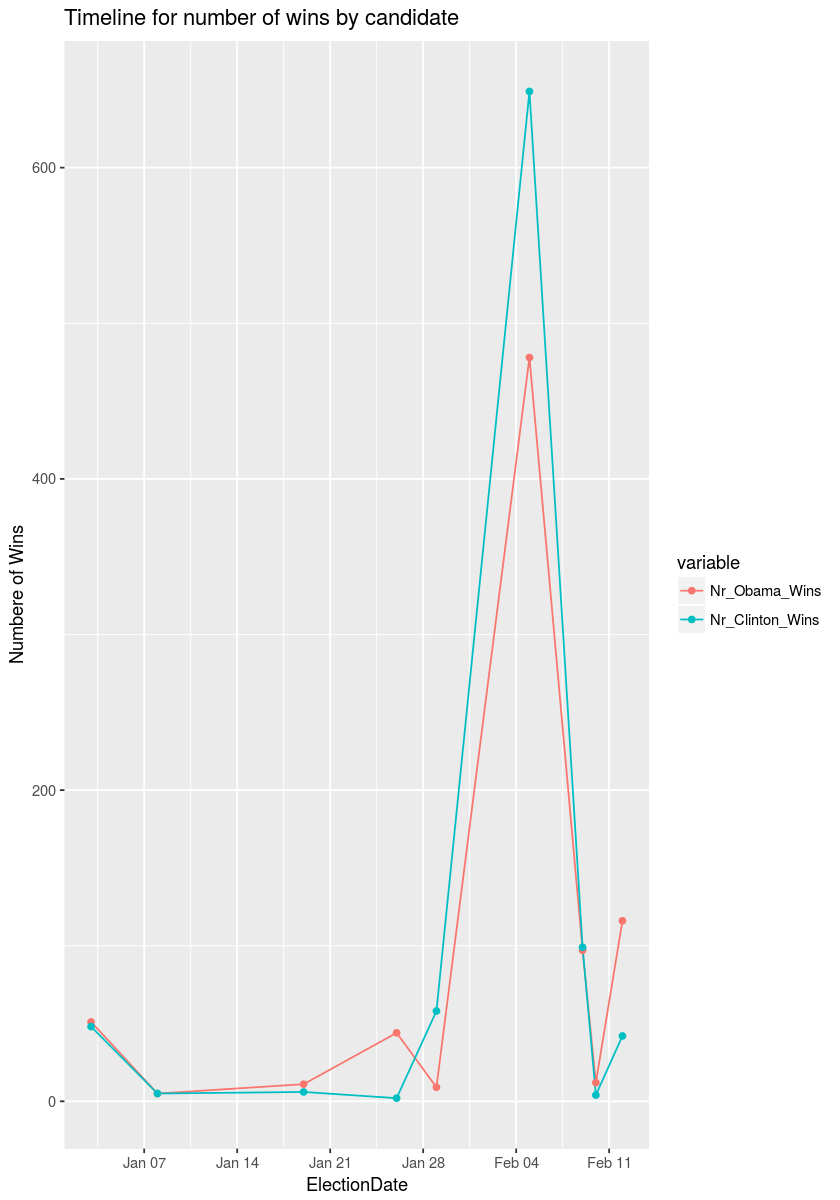

In [155]:
#Timelime for each cadidate's number of wins

ggplot(d3m, aes(x=ElectionDate, y=value, col=variable)) + geom_line()+
  ylab('Numbere of Wins')+

  geom_point() +
ggtitle("Timeline for number of wins by candidate")

In [157]:
da1<-elect.df.known %>%
   group_by(ElectionDate) %>%
   summarise(AvgBlack = mean(Black))
da1


ElectionDate,AvgBlack
2008-01-03,0.8444444
2008-01-08,0.6800000
2008-01-19,2.3235294
2008-01-26,37.1195652
2008-01-29,14.3746269
2008-02-05,9.5952085
2008-02-09,10.8397959
2008-02-10,0.5500000
2008-02-12,19.3911392


In [158]:
da2<-elect.df.known %>%
   group_by(ElectionDate) %>%
   summarise(AvgWhite = mean(White))
da2


ElectionDate,AvgWhite
2008-01-03,97.67172
2008-01-08,96.96000
2008-01-19,90.67059
2008-01-26,61.21304
2008-01-29,82.71791
2008-02-05,86.20248
2008-02-09,86.08112
2008-02-10,97.33125
2008-02-12,77.72089


In [159]:
da3<-elect.df.known %>%
   group_by(ElectionDate) %>%
   summarise(AvgAmericanIndian = mean(AmericanIndian))
da3


ElectionDate,AvgAmericanIndian
2008-01-03,0.2898990
2008-01-08,0.2600000
2008-01-19,3.7529412
2008-01-26,0.4086957
2008-01-29,0.6641791
2008-02-05,1.8477374
2008-02-09,1.3459184
2008-02-10,0.7125000
2008-02-12,0.3145570


In [160]:
da4<-elect.df.known %>%
   group_by(ElectionDate) %>%
   summarise(AvgHispanic = mean(Hispanic))
da4


ElectionDate,AvgHispanic
2008-01-03,2.835354
2008-01-08,1.450000
2008-01-19,14.294118
2008-01-26,2.947826
2008-01-29,10.549254
2008-02-05,7.510027
2008-02-09,4.727041
2008-02-10,0.887500
2008-02-12,3.298101


In [161]:
da5<-elect.df.known %>%
   group_by(ElectionDate) %>%
   summarise(AvgAsian = mean(Asian))
da5


ElectionDate,AvgAsian
2008-01-03,0.6959596
2008-01-08,1.2200000
2008-01-19,1.7058824
2008-01-26,0.6456522
2008-01-29,1.2373134
2008-02-05,1.2307010
2008-02-09,0.9020408
2008-02-10,0.5875000
2008-02-12,1.6658228


In [162]:
da6<-elect.df.known %>%
   group_by(ElectionDate) %>%
   summarise(AvgHawaiian = mean(Hawaiian))
da6


ElectionDate,AvgHawaiian
2008-01-03,0.02626263
2008-01-08,0.03000000
2008-01-19,0.19411765
2008-01-26,0.03913043
2008-01-29,0.05671642
2008-02-05,0.06521739
2008-02-09,0.06887755
2008-02-10,0.01875000
2008-02-12,0.03417722


In [163]:
#created a table with average of each ethicity for each election date


da<-merge(da1,da2,by="ElectionDate")
da<-merge(da,da3,by="ElectionDate")
da<-merge(da,da4,by="ElectionDate")
da<-merge(da,da5,by="ElectionDate")
da<-merge(da,da6,by="ElectionDate")

da

ElectionDate,AvgBlack,AvgWhite,AvgAmericanIndian,AvgHispanic,AvgAsian,AvgHawaiian
2008-01-03,0.8444444,97.67172,0.2898990,2.835354,0.6959596,0.02626263
2008-01-08,0.6800000,96.96000,0.2600000,1.450000,1.2200000,0.03000000
2008-01-19,2.3235294,90.67059,3.7529412,14.294118,1.7058824,0.19411765
2008-01-26,37.1195652,61.21304,0.4086957,2.947826,0.6456522,0.03913043
2008-01-29,14.3746269,82.71791,0.6641791,10.549254,1.2373134,0.05671642
2008-02-05,9.5952085,86.20248,1.8477374,7.510027,1.2307010,0.06521739
2008-02-09,10.8397959,86.08112,1.3459184,4.727041,0.9020408,0.06887755
2008-02-10,0.5500000,97.33125,0.7125000,0.887500,0.5875000,0.01875000
2008-02-12,19.3911392,77.72089,0.3145570,3.298101,1.6658228,0.03417722


In [164]:

dam <- reshape2::melt(da, id.var='ElectionDate')
dam


ElectionDate,variable,value
2008-01-03,AvgBlack,0.84444444
2008-01-08,AvgBlack,0.68000000
2008-01-19,AvgBlack,2.32352941
2008-01-26,AvgBlack,37.11956522
2008-01-29,AvgBlack,14.37462687
2008-02-05,AvgBlack,9.59520852
2008-02-09,AvgBlack,10.83979592
2008-02-10,AvgBlack,0.55000000
2008-02-12,AvgBlack,19.39113924
2008-01-03,AvgWhite,97.67171717


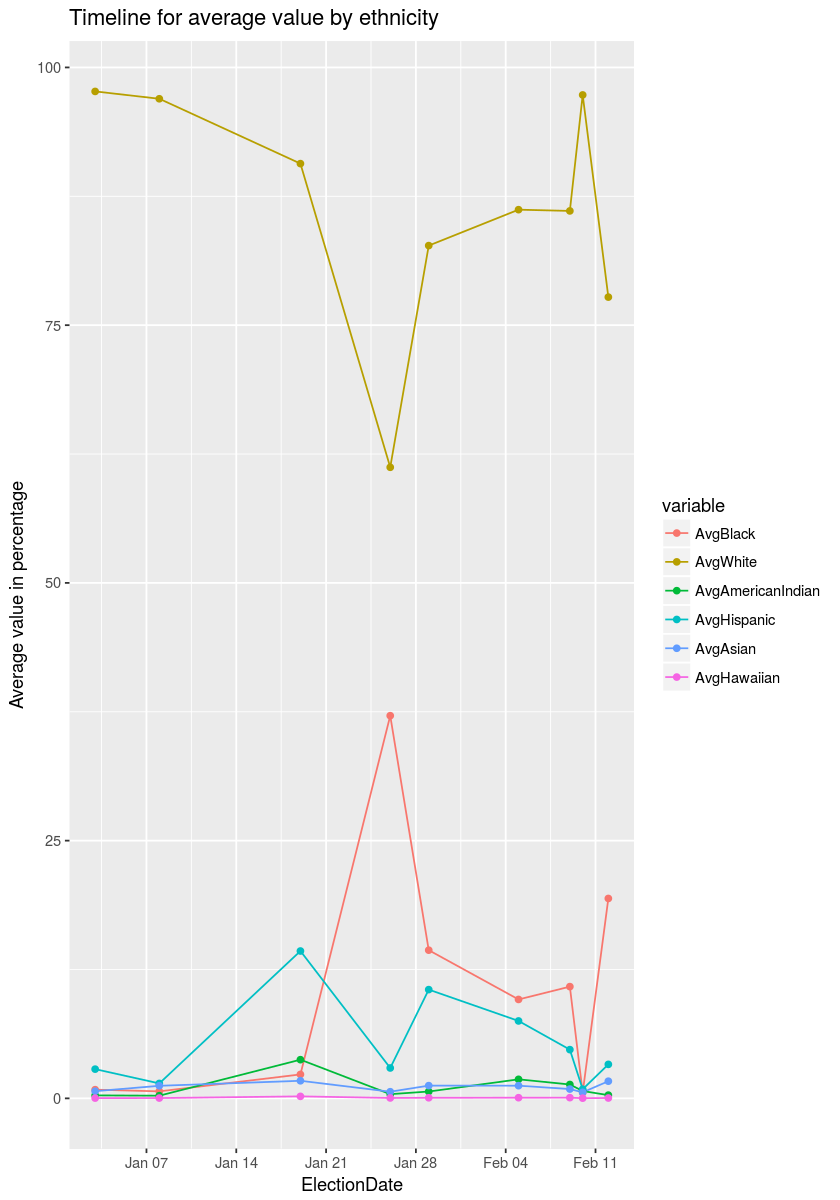

In [165]:
#Timeline for average number of ethinicities in the counties that voted in different dates

ggplot(dam, aes(x=ElectionDate, y=value, col=variable)) + geom_line()+
  ylab('Average value in percentage')+

  geom_point()  +
ggtitle("Timeline for average value by ethnicity")

<a id='section2.2.2.3.'></a>

#### 2.2.2.3. Age

In [166]:
# Libraries
library(ggplot2)
library(dplyr)



In [167]:
#created variables for the averages for each candidate and the age groups


a1=as.numeric(format(round(mean(elect.df.known$AgeBelow35[elect.df.known$ObamaWin=="Lose"]),2)))
b1=as.numeric(format(round(mean(elect.df.known$AgeBelow35[elect.df.known$ObamaWin=="Win"]),2)))

a2=as.numeric(format(round(mean(elect.df.known$Age35to65[elect.df.known$ObamaWin=="Lose"]),2)))
b2=as.numeric(format(round(mean(elect.df.known$Age35to65[elect.df.known$ObamaWin=="Win"]),2)))


a3=as.numeric(format(round(mean(elect.df.known$Age65andAbove[elect.df.known$ObamaWin=="Lose"]),2)))
b3=as.numeric(format(round(mean(elect.df.known$Age65andAbove[elect.df.known$ObamaWin=="Win"]),2)))



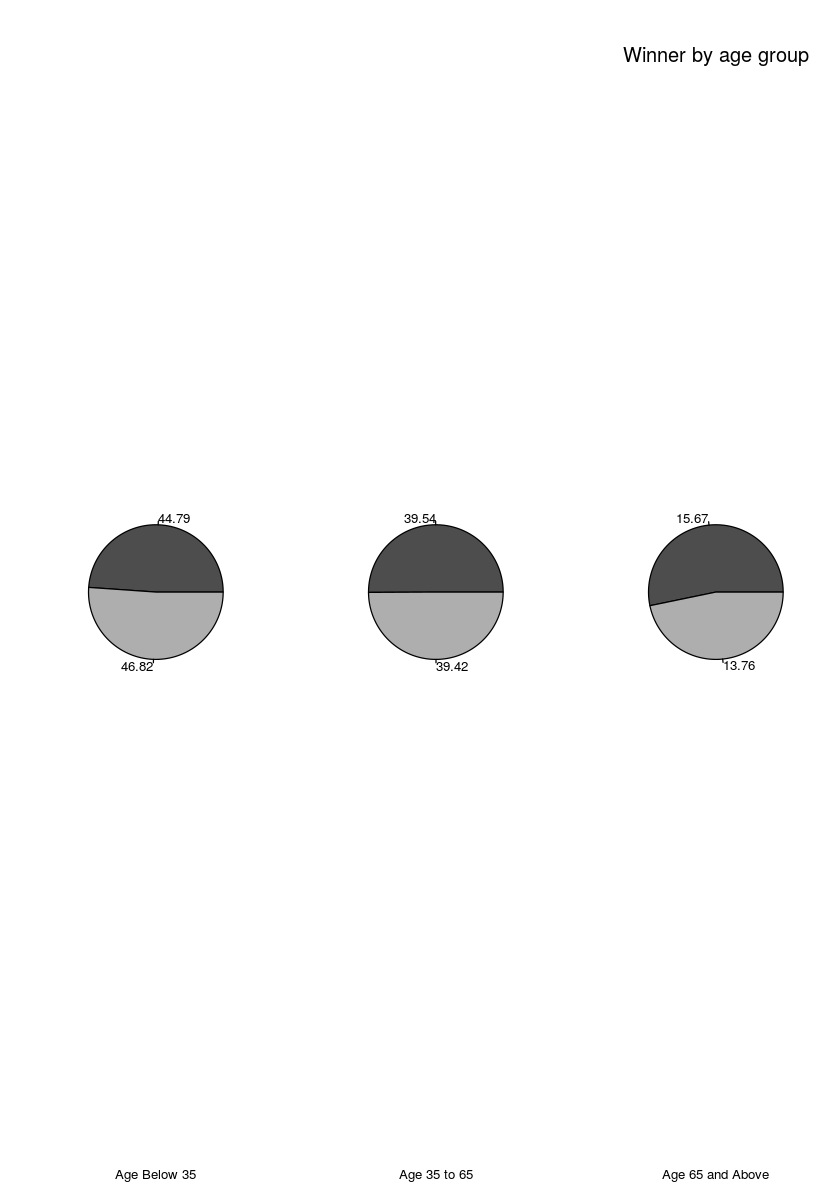

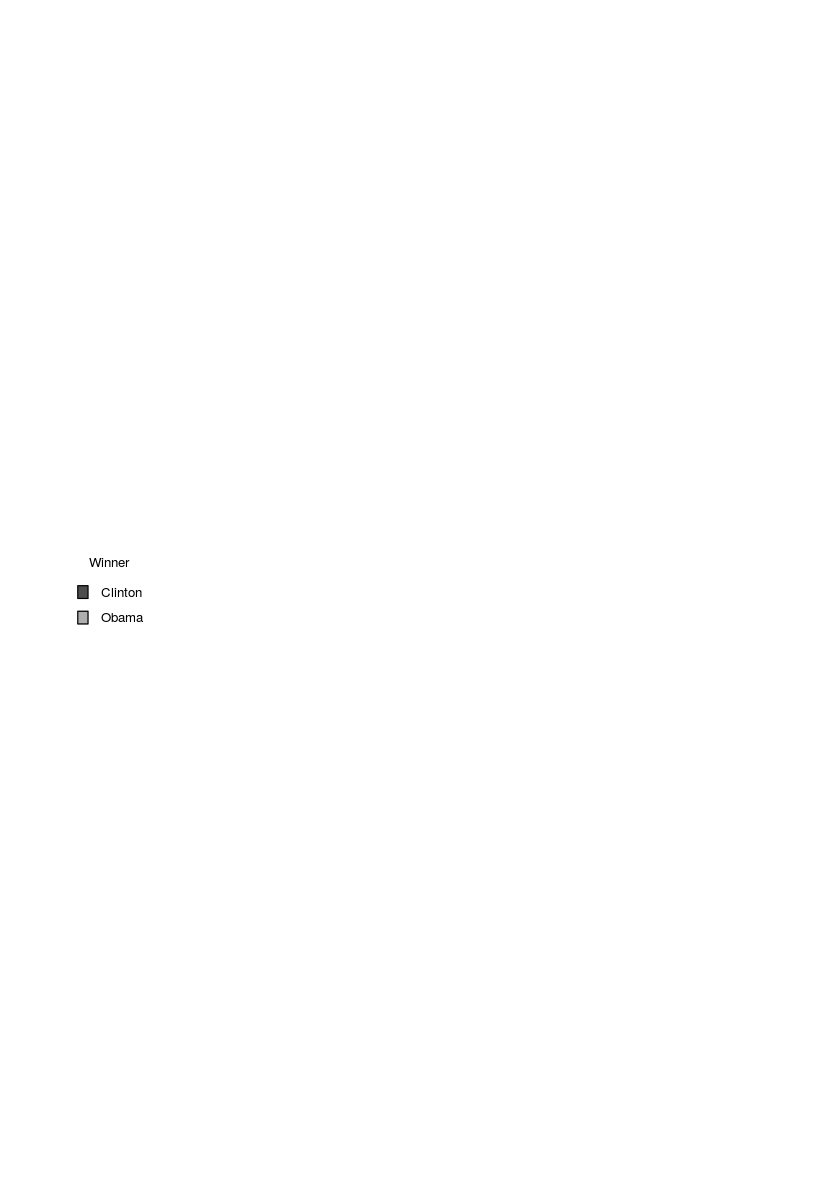

In [168]:
#  Pie Chart - winner by age groups
par(mfrow=c(1,3) )

library(plotrix)
slices1 <- c(a1,b1)
slices2 <- c(a2,b2)
slices3 <- c(a3,b3)


lbls <- c("Clinton","Obama")



pie(slices1,labels=slices1 ,
   xlab="Age Below 35",col=grey.colors(3))
pie(slices2,labels=slices2 ,
   xlab="Age 35 to 65",col=grey.colors(3))
pie(slices3,labels=slices3 ,
   xlab="Age 65 and Above",col=grey.colors(3))

mtext(side=3, text="Winner by age group")


plot.new()
    legend("left",legend=lbls, fill=grey.colors(3), box.lty=0, title="Winner")

##### Aggregate table

In [169]:
#winner by age group and region

roundmean <- function(x) round(mean(x),0)

(ag <- aggregate(cbind(AgeBelow35,Age35to65,Age65andAbove) ~ ObamaWin + Region, 
          data=elect.df, 
          FUN=roundmean))


ObamaWin,Region,AgeBelow35,Age35to65,Age65andAbove
Lose,Midwest,43,40,18
Win,Midwest,45,39,16
Lose,Northeast,45,41,14
Win,Northeast,43,43,14
Lose,South,45,40,15
Win,South,48,39,13
Lose,West,48,38,14
Win,West,47,40,13


<a id='section3.2.'></a>
### 3.2.  Split the known data into training/testing datasets

In [170]:
# Find the number of rows in the known dataset
nKnown <- nrow(elect.df.known)

# Set the seed for a random sample
set.seed(201)

# Randomly sample 75% of the row indices in the known dataset
rowIndicesTrain <- sample(1:nKnown,
                          size = round(nKnown*0.75),
                          replace = FALSE)

In [171]:
# Split the training set into the training set and the test set using these indices. 

elect.df.training <- elect.df.known[rowIndicesTrain, ]

elect.df.test <- elect.df.known[-rowIndicesTrain, ]

## Section 4 - generate and test prediction models

### 4.1. Three prediction models
<a id='section4.1.1.'></a>
#### 4.1.1.Linear regression model

In [172]:
#build the model 

lm1 <- lm(ObamaWinNr ~Black+White+Bachelors+SocialSecurityRate+MedicareRate
          +Age65andAbove+ HighSchool+IncomeAbove75K+MedianIncome+AgeBelow35 
          ,data = elect.df.training)
summary(lm1)


Call:
lm(formula = ObamaWinNr ~ Black + White + Bachelors + SocialSecurityRate + 
    MedicareRate + Age65andAbove + HighSchool + IncomeAbove75K + 
    MedianIncome + AgeBelow35, data = elect.df.training)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18494 -0.34364 -0.05188  0.38025  0.98090 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.864e+00  4.080e-01  -4.569 5.36e-06 ***
Black               2.303e-02  2.148e-03  10.723  < 2e-16 ***
White               6.850e-03  2.192e-03   3.125  0.00182 ** 
Bachelors           1.352e-02  2.909e-03   4.649 3.68e-06 ***
SocialSecurityRate -6.806e-06  7.124e-06  -0.955  0.33959    
MedicareRate       -1.371e-07  4.018e-06  -0.034  0.97279    
Age65andAbove      -8.789e-03  7.855e-03  -1.119  0.26340    
HighSchool          1.618e-02  2.520e-03   6.420 1.91e-10 ***
IncomeAbove75K     -2.915e-02  5.793e-03  -5.032 5.54e-07 ***
MedianIncome        1.773e-05  4.144e-06   4.278 2.03e-

In [173]:
#summarize results
lm1.pred<- predict(lm1, elect.df.test)

In [174]:
lm1.pred

1           6           7          11          27          31 
 0.48037953  0.57038515  0.64133580  0.44124432  0.36362411  0.55962763 
         35          38          41          43          44          46 
 0.40861548  0.53636857  0.56405467  0.41394254  0.53845702  0.48540699 
         49          50          51          64          66          72 
 0.37135224  0.54798824  0.61482453  0.44102365  0.45224386  0.32626625 
         74          76          77          80          83          85 
 0.38008087  0.42030423  0.73264647  0.33504300  0.48940106  0.89830382 
         88          91          93          94          95         106 
 0.48998234  0.61211071  0.26683035  0.47839684  0.48166431  0.61470959 
        108         110         119         120         122         125 
 0.66225387  0.44949989  0.10568890  0.11963449  0.46055742  0.37959442 
        132         136         143         146         150         152 
 0.70370143  1.01831954  0.67166768  0.95924685  0.75224080  0.58421151 
        162         164         165         168         176         184 
 0.63022269  1.17329341  0.44204606  0.52117769  0.58458934  0.45629236 
        188         189         204         209         212         216 
 0.78017961  0.48164582  0.76532910  0.26128470  0.42775110  0.53124793 
        220         224         227         232         239         246 
 0.79747194  0.47266011  0.63507851  0.25746244  0.27394646  0.64423533 
        257         267         273         275         276         282 
 0.62345494  0.34806897  0.56243680  0.04663951  1.05122543  1.09957355 
        287         289         293         294         295         301 
 0.10671856  0.68045094  0.70451163  0.73141328  0.34553640  0.45071313 
        316         317         320         327         333         336 
-0.15730612  0.50418719  0.37005715  0.43311204  0.12600510  0.30079066 
        342         349         350         351         355         360 
 0.66980961  0.19532318  0.57939800  0.38988724  0.28597064  0.71511838 
        365         379         380         395         403         410 
 0.13063585  0.32944911  0.27414632  0.35239487  0.55071476  0.20611695 
        418         420         426         427         428         434 
 0.38117690  0.09404710  0.31801531  0.48911920  0.41542847  0.32431540 
        435         437         438         454         457         459 
 0.21939443  0.31964170  0.41552734  0.19683716  0.77608847  0.14211605 
        463         465         466         467         468         472 
 0.55569854  0.91203992  0.14559709 -0.02004359  0.37475423  0.24152380 
        476         477         478         479         485         492 
 0.80873070  0.38782647  0.60503252  0.83937333  0.66100164  0.41966112 
        496         497         499         500         503         509 
 0.48620195  0.34898651  0.23368022  0.24942959  0.42758033  0.95905392 
        512         514         523         528         529         532 
 0.93859305  0.89999499  0.57064420  0.84898396  0.45926342  0.31655316 
        543         544         553         554         555         564 
 0.66955321  0.67568299  0.44125843  1.04327994  1.34681521  0.38700907 
        566         569         571         575         585         586 
 0.45043270  0.65726655  0.28497311  0.84739294  0.87157581  0.36830402 
        588         607         610         611         613         615 
 0.22323901  0.26667566  0.80064786  0.52129637  0.65735134  0.48234810 
        623         624         626         627         630         631 
 0.63145686  0.71721405  0.29208435  0.56900480  0.69905573  0.73826486 
        632         638         641         643         647         648 
 0.57067150  0.56666632  0.26411586  0.51302422  0.49867419  0.20666883 
        658         659         660         661         662         680 
 0.97521545  0.86730257  0.65746059  0.53544058  0.55340897  0.42956152 
        682         684         687         690         692         

In [175]:
elect.df$ObamaWinNr

[1]  1  0  1  0  1  0  1  0  1  1  1  0  0  1  1  1  0  0  0  0  1  1  1  0
  [25]  1  0  1  1  1  1  1  0  1  0  1  0  1  1  0  1  0  1  0  1  0  0  1  1
  [49]  1  0  1  1  1  0  1  0  1  0  0  1  1  0  1  1  0  0  0  0  0  1  0  0
  [73]  0  0  1  0  1  0  1  0  0  1  0  1  1  1  0  0  0  0  1  1  0  1  0  1
  [97]  0  0  1  0  1  1  0  1  0  1  0  0  1  1  0  1  1  1  1  1  0  0  0  0
 [121]  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [145]  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1
 [169]  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0
 [193]  0  0  1  0  0  0  0  0  0  0  1  1  0  0  0  1  0  0  1  0  0  0  0  0
 [217]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 [241]  0  1  0  0  1  1  0  1  0  0  1  1  0  0  0  0  1  1  0  0  0  1  1  0
 [265]  1  0  0  0  0  0  1  1  1  1  0  1  0  0  0  1  0  1  1  1  1  0  0  1
 [289]  1  1  0  1  1  1  0  1  0  1  1  1  1  1  0  0  1  0  0  0  1  0  0  0
 [313]  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [337]  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 [361]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 [385]  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  1
 [409]  0  0  0  0  0  1  0  0  1  0  1  0  0  1  0  0  1  0  0  1  0  1  0  0
 [433]  0  1  0  1  0  1  0  1  0  1  1  0  1  0  0  0  1  0  0  0  1  0  1  1
 [457]  1  1  0  0  1  1  0  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [481]  1  1  0  1  0  0  1  1  1  0  1  0  1  1  1  1  1  0  1  1  1  1  1  0
 [505]  0  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  0  1  0  1  1  0
 [529]  0  1  0  1  1  0  1  0  1  0  1  1  0  1  1  1  1  1  1  1  1  1  0  1
 [553]  1  1  0  1  1  1  1  1  1  1  0  1  1  1  1  1  0  0  1  1  0  1  1  1
 [577]  1  0  0  0  1  1  0  1  0  0  0  1  0  0  1  0  1  1  1  0  1  1  0  1
 [601]  0  0  1  1  0  0  1  0  1  1  1  1  1  1  1  1  1  1  0  1  0  1  1  1
 [625]  0  1  1  0  1  1  1  1  0  1  1  1  1  1  1  0  0  0  0  1  1  1  0  1
 [649]  1  1  0  1  1  1  0  1  1  1  1  0  1  1  1  1  1  1  0  1  1  1  1  0
 [673]  1  0  1  1  1  1  0  1  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1
 [697]  1  1  0  1  1  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1
 [721]  0  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1
 [745]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  0  1  1  0  1  0  1  1
 [769]  1  1  1  0  1  1  0  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1
 [793]  1  1  0  1  1  1  1  1  1  1  1  0  1  1  0  1  1  1  1  1  1  0  1  1
 [817]  1  1  1  1  1  0  1  1  1  1  1  0  1  1  1  1  1  0  0  0  1  0  1  0
 [841]  1  0  1  0  0  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [865]  1  1  0  1  1  1  0  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1  0  1
 [889]  1  1  1  0  1  0  1  1  1  0  1  0  1  1  1  1  0  0  1  1  1  0  1  0
 [913]  1  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  1  0  1  1  1  1  0  0
 [937]  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 [961]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
 [985]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
[1009]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
[1033]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1
[1057]  0  0  1  1  0  0  0  0  0  0  1  0  1  0  1  1  0  0  0  0  0  0  0  0
[1081]  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  1  0  0  0  0
[1105]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[1129]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[1153]  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[1177]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[1201]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [176]:
#round the predictions to the appropriate class

class_prediction <-
    ifelse(lm1.pred>0.50,
          "1",
          "0")

In [177]:
.libPaths("/usr/local/lib/R/site-library")
library(caret)

In [178]:
#see model accuracy

confusionMatrix(class_prediction, elect.df.test$ObamaWinNr)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 174  87
         1  46 127
                                          
               Accuracy : 0.6935          
                 95% CI : (0.6478, 0.7366)
    No Information Rate : 0.5069          
    P-Value [Acc > NIR] : 2.346e-15       
                                          
                  Kappa : 0.3854          
 Mcnemar's Test P-Value : 0.0005235       
                                          
            Sensitivity : 0.7909          
            Specificity : 0.5935          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.7341          
             Prevalence : 0.5069          
         Detection Rate : 0.4009          
   Detection Prevalence : 0.6014          
      Balanced Accuracy : 0.6922          
                                          
       'Positive' Class : 0               
                                          

In [179]:
#create results table
model.results <- data.frame(Accuracy=0.69,  Model="linear regression")

<a id='section4.1.2.'></a>
#### 4.1.2. Backward stepwise with most correlated variables

In [180]:
# stepwise
lm.step.backward <- step(lm1, direction = "backward")

Start:  AIC=-2282.12
ObamaWinNr ~ Black + White + Bachelors + SocialSecurityRate + 
    MedicareRate + Age65andAbove + HighSchool + IncomeAbove75K + 
    MedianIncome + AgeBelow35

                     Df Sum of Sq    RSS     AIC
- MedicareRate        1    0.0002 221.84 -2284.1
- AgeBelow35          1    0.0003 221.84 -2284.1
- SocialSecurityRate  1    0.1568 222.00 -2283.2
- Age65andAbove       1    0.2151 222.06 -2282.9
<none>                            221.84 -2282.1
- White               1    1.6776 223.52 -2274.3
- MedianIncome        1    3.1448 224.99 -2265.8
- Bachelors           1    3.7139 225.56 -2262.5
- IncomeAbove75K      1    4.3511 226.20 -2258.8
- HighSchool          1    7.0829 228.93 -2243.2
- Black               1   19.7584 241.60 -2173.0

Step:  AIC=-2284.12
ObamaWinNr ~ Black + White + Bachelors + SocialSecurityRate + 
    Age65andAbove + HighSchool + IncomeAbove75K + MedianIncome + 
    AgeBelow35

                     Df Sum of Sq    RSS     AIC
- AgeBelow35    

In [181]:
summary(lm.step.backward)


Call:
lm(formula = ObamaWinNr ~ Black + White + Bachelors + Age65andAbove + 
    HighSchool + IncomeAbove75K + MedianIncome, data = elect.df.training)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17344 -0.34302 -0.05882  0.38173  1.00453 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.947e+00  2.353e-01  -8.276 3.14e-16 ***
Black           2.278e-02  2.128e-03  10.707  < 2e-16 ***
White           6.477e-03  2.159e-03   3.000  0.00276 ** 
Bachelors       1.381e-02  2.843e-03   4.858 1.33e-06 ***
Age65andAbove  -1.529e-02  3.469e-03  -4.407 1.13e-05 ***
HighSchool      1.674e-02  2.457e-03   6.811 1.48e-11 ***
IncomeAbove75K -2.947e-02  5.774e-03  -5.105 3.80e-07 ***
MedianIncome    1.834e-05  4.022e-06   4.560 5.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4142 on 1294 degrees of freedom
Multiple R-squared:  0.315,	Adjusted R-squared:  0.3112 
F-statistic: 84.99 on 7

In [182]:
#summarize results
lm.step.backward.pred<- predict(lm.step.backward, elect.df.test)
lm.step.backward.pred

1            6            7           11           27           31 
 0.459151018  0.566826392  0.640563630  0.429771420  0.354209667  0.558431695 
          35           38           41           43           44           46 
 0.403703803  0.538182904  0.556460513  0.407766977  0.538461546  0.482549329 
          49           50           51           64           66           72 
 0.365737240  0.546691505  0.615785906  0.442581577  0.438637219  0.318032764 
          74           76           77           80           83           85 
 0.365709189  0.419413044  0.732380986  0.325221441  0.482043319  0.895506048 
          88           91           93           94           95          106 
 0.492410595  0.611458722  0.270630038  0.483351406  0.478217864  0.624064657 
         108          110          119          120          122          125 
 0.668769073  0.439765607  0.123428084  0.141744254  0.462390681  0.371573848 
         132          136          143          146          150          152 
 0.692836769  1.015195019  0.674881606  0.957926809  0.760886938  0.595886689 
         162          164          165          168          176          184 
 0.631876194  1.179378348  0.446085440  0.529043516  0.568649771  0.453483024 
         188          189          204          209          212          216 
 0.783158279  0.498032193  0.761240896  0.277107115  0.405324855  0.512196539 
         220          224          227          232          239          246 
 0.791578370  0.459718178  0.641073478  0.346264040  0.289698121  0.653855670 
         257          267          273          275          276          282 
 0.650823930  0.364380517  0.572500651  0.048783271  1.060914488  1.107501417 
         287          289          293          294          295          301 
 0.114432683  0.687731282  0.722882009  0.739485851  0.344411942  0.466039738 
         316          317          320          327          333          336 
-0.153284111  0.497147291  0.378309606  0.428472898  0.138239405  0.322286574 
         342          349          350          351          355          360 
 0.668374691  0.207704660  0.577796833  0.399535963  0.296369792  0.709372355 
         365          379          380          395          403          410 
 0.141730310  0.341835780  0.270966025  0.354012203  0.552169398  0.207108268 
         418          420          426          427          428          434 
 0.396525121  0.072217657  0.304444115  0.490749315  0.420272272  0.309362164 
         435          437          438          454          457          459 
 0.208040837  0.317145612  0.408275433  0.192822138  0.767768707  0.120921953 
         463          465          466          467          468          472 
 0.555040456  0.924090925  0.128403086  0.010249609  0.348522363  0.254232552 
         476          477          478          479          485          492 
 0.809090590  0.383123421  0.591771264  0.837128213  0.656507339  0.399606692 
         496          497          499          500          503          509 
 0.483331286  0.352344435  0.206330824  0.239148624  0.414700470  0.959410815 
         512          514          523          528          529          532 
 0.930948523  0.896335062  0.569549652  0.856705898  0.462997167  0.311245638 
         543          544          553          554          555          564 
 0.661608468  0.680944158  0.435564213  1.039592146  1.335316584  0.372287482 
         566          569          571          575          585          586 
 0.440617741  0.648134894  0.273140937  0.866210342  0.883810562  0.370557377 
         588          607          610          611          613          615 
 0.229671033  0.258564432  0.807084159  0.512391111  0.658828089  0.487692173 
         623          624          626          627          630          631 
 0.628992588  0.729661955  0.297391189  0.563987303  0.692330430  0.752970405 
         632          638          641          643          

In [183]:
#round results to the appropriate class

class_prediction <-
    ifelse(lm.step.backward.pred>0.50,
          "1",
          "0")

In [184]:
#see model accuracy

confusionMatrix(class_prediction, elect.df.test$ObamaWinNr)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 175  87
         1  45 127
                                          
               Accuracy : 0.6959          
                 95% CI : (0.6502, 0.7388)
    No Information Rate : 0.5069          
    P-Value [Acc > NIR] : 1.053e-15       
                                          
                  Kappa : 0.39            
 Mcnemar's Test P-Value : 0.0003589       
                                          
            Sensitivity : 0.7955          
            Specificity : 0.5935          
         Pos Pred Value : 0.6679          
         Neg Pred Value : 0.7384          
             Prevalence : 0.5069          
         Detection Rate : 0.4032          
   Detection Prevalence : 0.6037          
      Balanced Accuracy : 0.6945          
                                          
       'Positive' Class : 0               
                                          

In [185]:
# Save the results for later ...

model.results <- rbind(model.results, data.frame(Accuracy=0.69,  Model="Stepwise with most correlated variables"))




<a id='section4.1.3.'></a>

#### 4.1.3. Classification tree 

In [186]:
library(rpart)
library(rpart.plot)    # install.packages("rpart.plot") if needed

In [187]:
set.seed(999)  # optional: as rpart randomly applies cross-validation setting seed ensures repeatability of outcomes

rt.all <- rpart(ObamaWin ~
          Black+HighSchool+
           MedianIncome+
        MedicareRate+
            AgeBelow35,
          
           

         data = elect.df.known,  # as rpart uses cross-validation can use entire known dataset rather than training dataset
         xval=5,  # this is the number of cross-validations
         cp = 0.001)

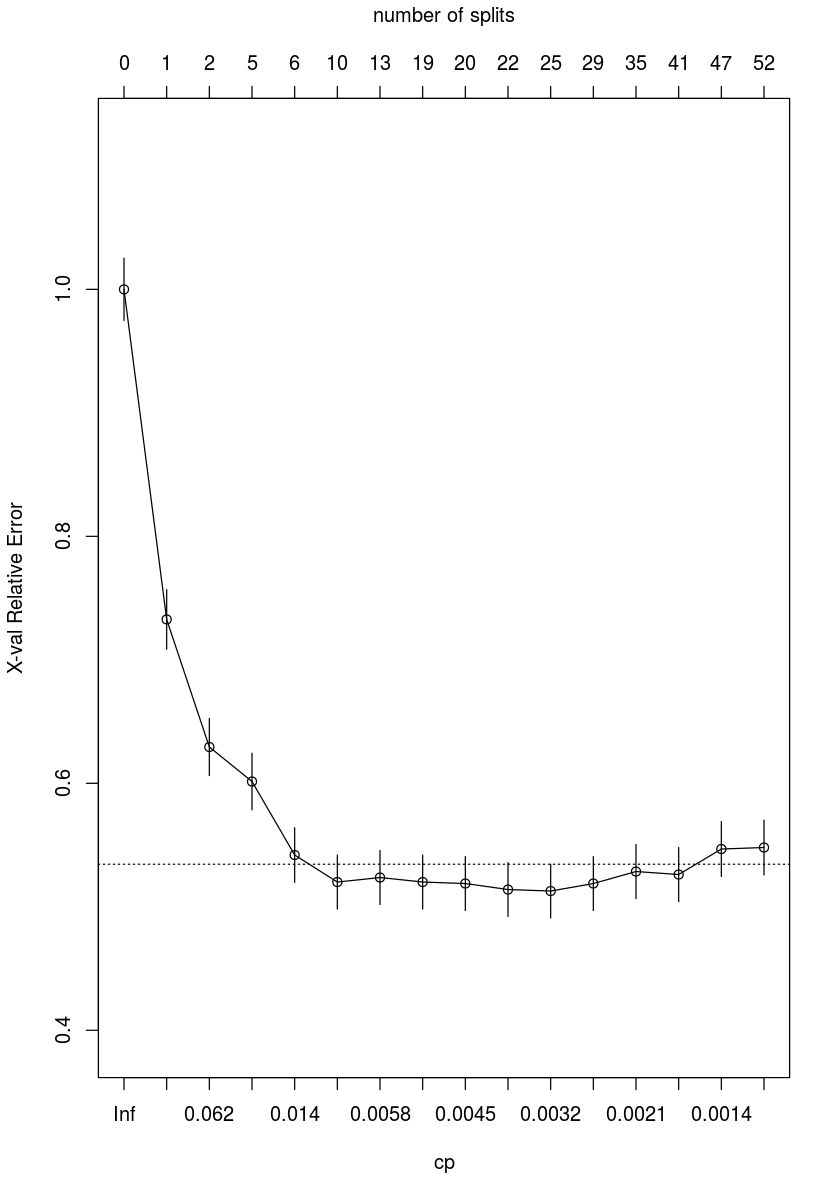

In [188]:
plotcp(rt.all,upper = "splits")

In [189]:
# This function determines the optimal cp corresponding to the tree with the smallest number of splits that has 
# a xerror value less than the tree with the best (minimum) xerror value plus its standard error (xstd) 

optimalCP <- function(rt.model){
    df<-as.data.frame(rt.model$cptable)
    minerr <- min(df[,"xerror"])
    minerr.xstd <- df[df$xerror==minerr,"xstd"]
    df[df$xerror<minerr+minerr.xstd,][1,"CP"]}

optimalCP(rt.all)

[1] 0.006075334

In [190]:
# We can now use this function to "prune" the rpart model back to an optimal number of splits

rt.all.opt <- prune(rt.all, cp=optimalCP(rt.all))

In [191]:
options(scipen = 999)

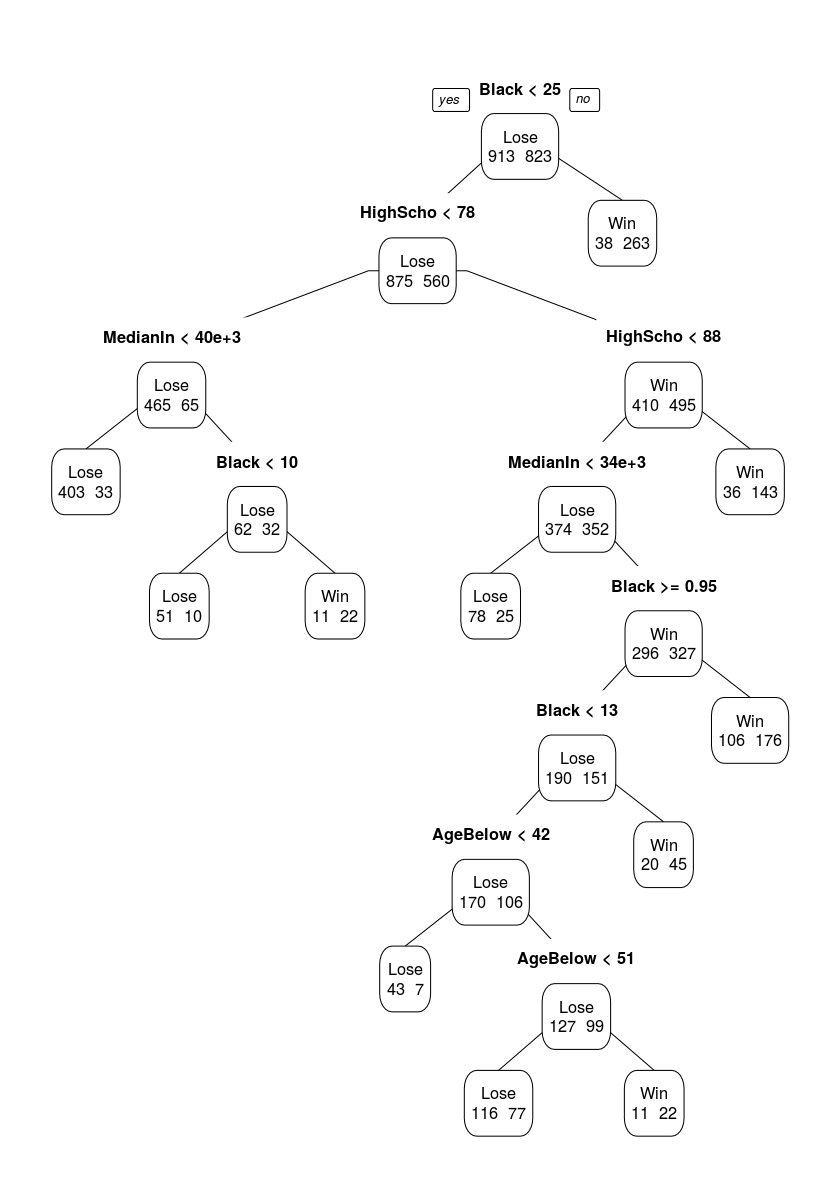

In [192]:

prp(rt.all.opt, type = 1, extra = 1)  

In [193]:
rt.all.opt.pred <- predict(rt.all.opt, elect.df.test)


In [194]:
rt.all.opt.pred

,Lose,Win
1,0.2011173,0.7988827
6,0.2011173,0.7988827
7,0.6010363,0.3989637
11,0.6010363,0.3989637
27,0.7572816,0.2427184
31,0.6010363,0.3989637
35,0.3758865,0.6241135
38,0.3758865,0.6241135
41,0.3758865,0.6241135
43,0.3758865,0.6241135


In [195]:
#assign the predictions to the right class

class_prediction <-
  ifelse(rt.all.opt.pred[,1] > 0.50,
         "Lose",
         "Win"
  )

In [196]:
#see model accuracy 

confusionMatrix( class_prediction, elect.df.test$ObamaWin)

Confusion Matrix and Statistics

          Reference
Prediction Lose Win
      Lose  167  46
      Win    53 168
                                             
               Accuracy : 0.7719             
                 95% CI : (0.7295, 0.8106)   
    No Information Rate : 0.5069             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.5439             
 Mcnemar's Test P-Value : 0.5465             
                                             
            Sensitivity : 0.7591             
            Specificity : 0.7850             
         Pos Pred Value : 0.7840             
         Neg Pred Value : 0.7602             
             Prevalence : 0.5069             
         Detection Rate : 0.3848             
   Detection Prevalence : 0.4908             
      Balanced Accuracy : 0.7721             
                                             
       'Positive' Class : Lose               
             

In [197]:
#save the results
model.results <- rbind(model.results, data.frame(Accuracy=0.77,  Model="Classification tree"))

In [198]:
model.results

Accuracy,Model
0.69,linear regression
0.69,Stepwise with most correlated variables
0.77,Classification tree


<a id='section4.2.'></a>
### 4.2. Use best model to predict on unkown dataset

In [199]:
unknown.pred <- predict(rt.all.opt, elect.df.unknown)

In [200]:
unknown.pred

,Lose,Win
1738,0.3758865,0.62411348
1739,0.6010363,0.39896373
1741,0.3758865,0.62411348
1742,0.9243119,0.07568807
1743,0.7572816,0.24271845
1744,0.3758865,0.62411348
1745,0.3758865,0.62411348
1746,0.6010363,0.39896373
1747,0.3758865,0.62411348
1748,0.3758865,0.62411348


In [201]:
#assign the prediction probabilities to the right class (class with higher probability)

class_prediction <-
  ifelse(unknown.pred[,1] > 0.50,
         "Lose",
         "Win"
  )

In [202]:
#predict vote winner and save as csv

predictions.df <- elect.df.unknown 

predictions.df$PredictedObamaWin <-class_prediction

write.csv(predictions.df, file="PredictedObamaWin.csv")

In [203]:
predictions.df

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,⋯,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaWin,ObamaWinNr,PredictedObamaWin
1738,Hawaii,HI,West,15001,2008-02-19,Caucuses,NA,NA,NA,100.0,⋯,2269,64.5,57.7,171191,42.5,5087,821,NA,NA,Win
1739,Honolulu,HI,West,15003,2008-02-19,Caucuses,NA,NA,NA,99.1,⋯,1825,54.6,56.3,909863,1517.0,2127,71,NA,NA,Lose
1741,Maui,HI,West,15009,2008-02-19,Caucuses,NA,NA,NA,100.9,⋯,1122,57.6,55.8,141320,121.9,2399,257,NA,NA,Win
1742,Adams,WI,Midwest,55001,2008-02-19,Primary,NA,NA,NA,116.2,⋯,2113,85.3,59.4,20843,32.2,689,124,NA,NA,Lose
1743,Ashland,WI,Midwest,55003,2008-02-19,Primary,NA,NA,NA,97.5,⋯,2243,70.7,62.3,16511,15.8,2294,59,NA,NA,Lose
1744,Barron,WI,Midwest,55005,2008-02-19,Primary,NA,NA,NA,97.8,⋯,1791,75.8,58.1,45889,53.2,890,352,NA,NA,Win
1745,Bayfield,WI,Midwest,55007,2008-02-19,Primary,NA,NA,NA,103.0,⋯,1697,82.6,66.5,15147,10.3,2042,112,NA,NA,Win
1746,Brown,WI,Midwest,55009,2008-02-19,Primary,NA,NA,NA,98.8,⋯,1432,65.4,53.3,240213,454.4,615,197,NA,NA,Lose
1747,Buffalo,WI,Midwest,55011,2008-02-19,Primary,NA,NA,NA,101.4,⋯,1460,76.5,66.4,13897,20.3,710,316,NA,NA,Win
1748,Burnett,WI,Midwest,55013,2008-02-19,Primary,NA,NA,NA,100.2,⋯,1585,84.5,62.6,16490,20.1,880,98,NA,NA,Win


<a id='section5'></a>
## Section 5 - visuals for conclusion

Top 10 counties by population in the counties that did not vote and were predicted Cliton.

In [204]:
.libPaths("/usr/local/lib/R/site-library")

library(dplyr)

In [205]:
#dataset with top 10 counties by population in which Cliton was predicted to win

data<-predictions.df[predictions.df$PredictedObamaWin=="Lose",]

data <- data[with(data,order(-Pop)),]
data <- data[1:10,]


data

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,⋯,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaWin,ObamaWinNr,PredictedObamaWin
1920,Bexar,TX,South,48029,2008-03-04,Primary,NA,NA,NA,95.3,⋯,2823,61.2,51.2,1555592,1247.6,1257,441,NA,NA,Lose
1739,Honolulu,HI,West,15003,2008-02-19,Caucuses,NA,NA,NA,99.1,⋯,1825,54.6,56.3,909863,1517.0,2127,71,NA,NA,Lose
1976,El Paso,TX,South,48141,2008-03-04,Primary,NA,NA,NA,92.5,⋯,3424,63.6,55.2,736310,726.8,1015,114,NA,NA,Lose
2012,Hidalgo,TX,South,48215,2008-03-04,Primary,NA,NA,NA,95.1,⋯,4651,73.1,61.1,700634,446.3,1583,593,NA,NA,Lose
2736,Multnomah,OR,West,41051,2008-05-20,Primary,NA,NA,NA,98.6,⋯,2320,56.9,44.9,681454,1565.7,466,34,NA,NA,Lose
1905,Providence,RI,Northeast,44007,2008-03-04,Primary,NA,NA,NA,93.1,⋯,3708,53.2,56.6,635596,1538.0,436,17,NA,NA,Lose
2312,Lancaster,PA,Northeast,42071,2008-04-22,Primary,NA,NA,NA,95.7,⋯,1557,70.8,60.2,494486,521.0,984,412,NA,NA,Lose
2343,York,PA,Northeast,42133,2008-04-22,Primary,NA,NA,NA,97.2,⋯,1531,76.1,60.2,416322,460.3,910,285,NA,NA,Lose
2282,Berks,PA,Northeast,42011,2008-04-22,Primary,NA,NA,NA,96.6,⋯,1864,74.0,61.1,401149,467.1,866,216,NA,NA,Lose
1936,Cameron,TX,South,48061,2008-03-04,Primary,NA,NA,NA,92.6,⋯,4750,67.7,58.5,387717,428.1,1276,350,NA,NA,Lose


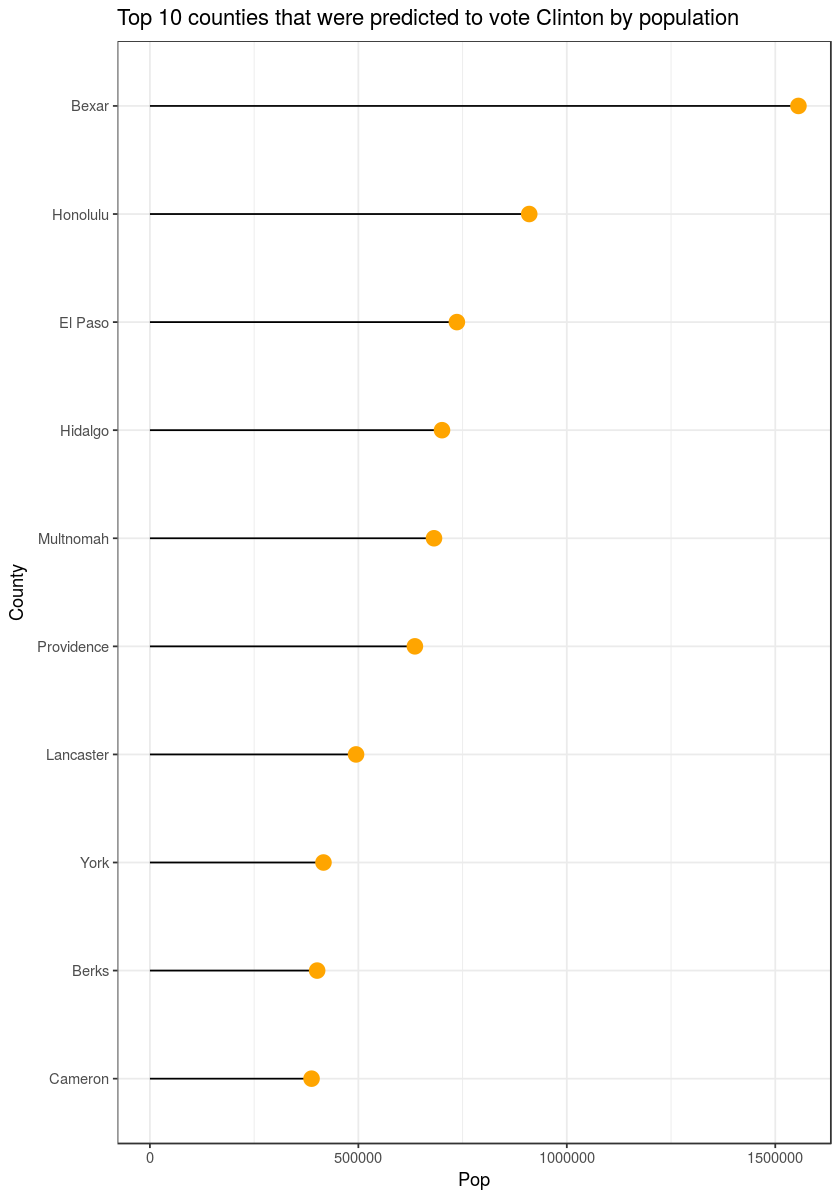

In [206]:


# Barplot
ggplot(data, aes(x=reorder(County,Pop), y=Pop)) + 
   geom_segment( aes(xend=County, yend=0)) +
geom_point( size=4, color="orange")+
xlab("County")+
coord_flip() +
theme_bw()+
ggtitle("Top 10 counties that were predicted to vote Clinton by population")


In [207]:
#dataset with top 10 counties by population in which Obama was predicted to win

data<-predictions.df[predictions.df$PredictedObamaWin=="Win",]

data <- data[with(data,order(-Pop)),]
data <- data[1:10,]


data

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,⋯,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaWin,ObamaWinNr,PredictedObamaWin
2005,Harris,TX,South,48201,2008-03-04,Primary,NA,NA,NA,100.0,⋯,2078,55.3,47.8,3886207,2247.9,1778,305,NA,NA,Win
1962,Dallas,TX,South,48113,2008-03-04,Primary,NA,NA,NA,101.8,⋯,1823,52.6,45.3,2345815,2666.9,909,89,NA,NA,Win
2123,Tarrant,TX,South,48439,2008-03-04,Primary,NA,NA,NA,99.3,⋯,1381,60.8,44.9,1671295,1935.7,897,173,NA,NA,Win
2327,Philadelphia,PA,Northeast,42101,2008-04-22,Primary,NA,NA,NA,87.1,⋯,6461,59.3,61.9,1448394,10721.7,143,0,NA,NA,Win
1831,Cuyahoga,OH,Midwest,39035,2008-03-04,Primary,NA,NA,NA,90.0,⋯,3104,63.2,59.6,1314241,2866.5,1246,4,NA,NA,Win
2278,Allegheny,PA,Northeast,42003,2008-04-22,Primary,NA,NA,NA,90.7,⋯,2556,67.0,64.6,1223411,1675.5,745,34,NA,NA,Win
1838,Franklin,OH,Midwest,39049,2008-03-04,Primary,NA,NA,NA,95.9,⋯,2235,56.9,46.4,1095662,2029.5,543,82,NA,NA,Win
2130,Travis,TX,South,48453,2008-03-04,Primary,NA,NA,NA,106.4,⋯,1375,51.4,37.6,921006,931.0,1022,298,NA,NA,Win
1782,Milwaukee,WI,Midwest,55079,2008-02-19,Primary,NA,NA,NA,92.8,⋯,3615,52.6,52.3,915097,3788.3,1190,6,NA,NA,Win
2392,Marion,IN,Midwest,18097,2008-05-06,Primary,NA,NA,NA,94.4,⋯,2101,59.3,47.2,865504,2184.2,403,24,NA,NA,Win


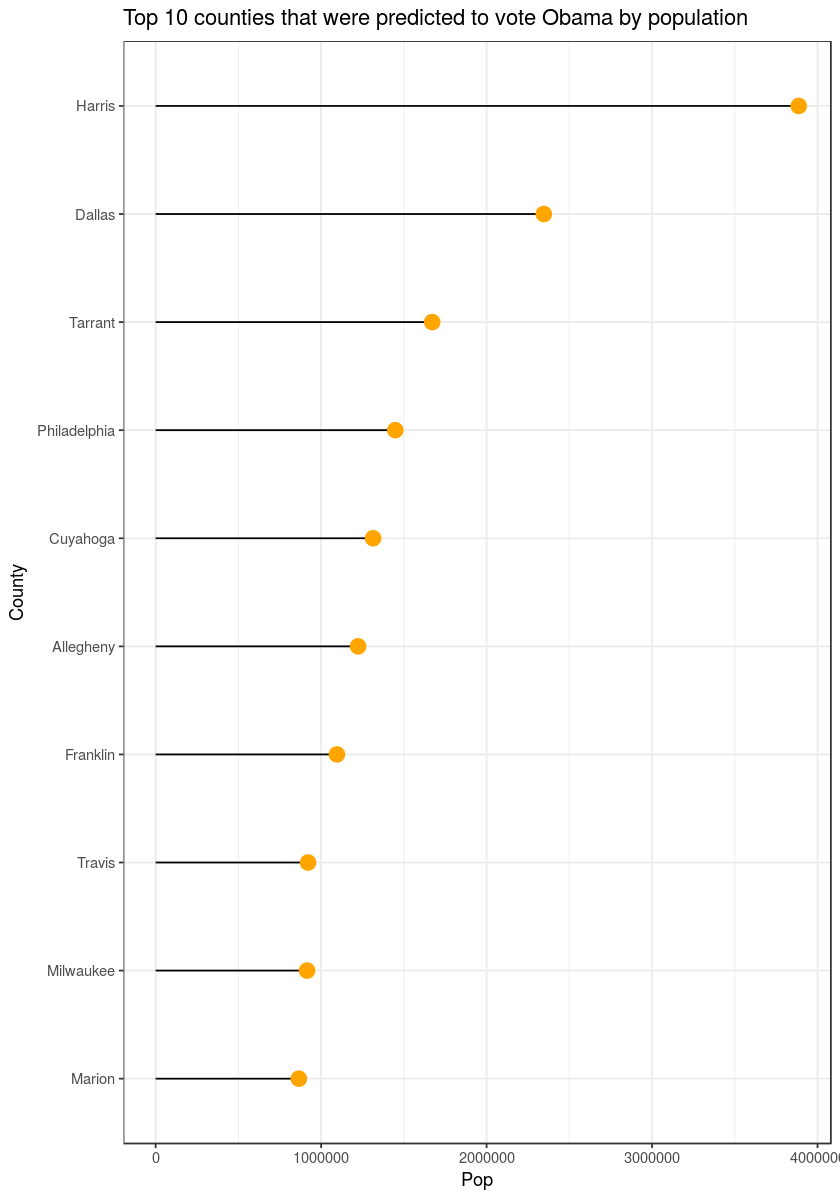

In [208]:

# Barplot
ggplot(data, aes(x=reorder(County,Pop), y=Pop)) + 
   geom_segment( aes(xend=County, yend=0)) +
geom_point( size=4, color="orange")+
xlab("County")+
coord_flip() +
theme_bw()+
ggtitle("Top 10 counties that were predicted to vote Obama by population")

<a id='section2'></a>
# Part 2 - NICU 

In [ ]:
#NICU
#Load libraries
.libPaths("/usr/local/lib/R/site-library")
library(ggplot2)
library(caret)
library("forecast")
library(tidyr)
library(lubridate)
library(repr)

In [ ]:
#Read US births data and create Year, Month, Day columns
baby.df <- read.csv("US_Births.csv")
baby.df$Date <- as.Date(paste(as.character(baby.df$Yr_Mo), "1", sep=""), format = "%Y%m%d")
baby.df_2 <- separate(baby.df, Date, c("Year", "Month", "Day"))
baby.df_2

In [ ]:
#Storing Births Data in a Time Series Object
Live.Births.ts <- ts(baby.df_2$Live.Births, 
                start = c(2007, 01), 
                end = c(2012, 06), 
                freq = 12)

In [ ]:
#Adjusting and plotting Number of Births
options(repr.plot.width=10, repr.plot.height=6.5)  

plot(Live.Births.ts, ylab = "number of births")

In [ ]:
#AAN model + RMSE 
(Live.Births.ets.AAN <- ets(Live.Births.ts, model = "AAN"))

rmse.ets <- function (etsmodel) cat("RMSE = ", 
                                    sqrt(etsmodel$mse))

rmse.ets(Live.Births.ets.AAN)

In [ ]:
#Plotting AAN
plot(Live.Births.ets.AAN)

In [ ]:
#AAA model + RMSE 
(Live.Births.ets.AAA <- ets(Live.Births.ts, model = "AAA"))

rmse.ets <- function (etsmodel) cat("RMSE = ", 
                                    sqrt(etsmodel$mse))

rmse.ets(Live.Births.ets.AAA)

In [ ]:
#Plotting AAA (Seasonality)
plot(Live.Births.ets.AAA)

In [ ]:
#Forecasting AAA Model to Feb 2013
Live.Births.ets.AAA.pred <- forecast(Live.Births.ets.AAA, h = 8)


#Plot the forecast for the AAA model
par(mfrow = c(2, 2))
plot(Live.Births.ets.AAA.pred)

In [ ]:
#Number of US Births in Feb 2013 with 80% conf level
forecast <- forecast(Live.Births.ets.AAA, h = 8, level = c(80, 95))

cat('February 2013: mean births = ',round(forecast$mean[8],1),"\n")
cat('           upper 80% confid. births = ',round(forecast$upper[8,1],1),"\n")

In [ ]:
#Load the NICU dataset
NICU.df <- read.csv("NICU.csv")

In [ ]:
#Store the admits data in a Time Series Object
admits.ts <- ts(NICU.df$Admits, 
                start = c(2007, 7), 
                end = c(2013, 2), 
                freq = 12)

In [ ]:
#Plotting AAA Model Admits
(admits.ets.AAA <- ets(admits.ts, model = "AAA"))
plot(admits.ets.AAA)

In [ ]:
#Store the ALOS data in a Time Series Object
alos.ts <- ts(NICU.df$ALOS, 
                start = c(2007, 7), 
                end = c(2013, 2), 
                freq = 12)

In [ ]:
#Plotting AAA Model ALOS
(alos.ets.AAA <- ets(alos.ts, model = "AAA"))
plot(alos.ets.AAA)

In [ ]:
NICU.df$Census <- with(NICU.df, Admits*ALOS*12/365)

In [ ]:
census.ts <- ts(NICU.df$Census[-(1:12)],     # remove first 12 months that are missing ALOS data
              start = c(2008,7), 
              end = c(2013,2), 
              freq = 12)

autoplot(census.ts, ylab = "Census (Bed Occupancy)")

In [ ]:
census.ets.ann <- ets(census.ts, model = "ANN")
rmse.ets(census.ets.ann)

In [ ]:
census.ets.aan <- ets(census.ts, model = "AAN")
rmse.ets(census.ets.aan)

In [ ]:
census.ets.aaa <- ets(census.ts, model = "AAA")
rmse.ets(census.ets.aaa)

In [ ]:
forecast <- forecast(census.ets.aaa, h = 23, level = c(80, 95))

cat('December 2014: mean beds = ',round(forecast$mean[23],1),"\n")
cat('           upper 80% confid. beds = ',round(forecast$upper[23,1],1),"\n")

plot(forecast, ylab = "Census")

<a id='section3'></a>
# Appendix

### 2.2.2.1. Income

In [123]:

#Aggregate table 1 - Mean IncomeAbove75K by ObamaWin
aggregate(IncomeAbove75K ~ ObamaWin, 
                   data=elect.df, 
                   FUN=mean)

ObamaWin,IncomeAbove75K
Lose,12.82738
Win,16.50535


### 2.2.2.3. Age

In [129]:
#Create a "Winner" attribute with either Obama or Clinton as possible values
elect.df$Winner <- ifelse(elect.df$Obama>elect.df$Clinton,
                                "Obama",
                                "Clinton")


In [128]:
#Aggregate table 2 - Mean AgeBelow35, Age35to65 and Age65andAbove where Obama and Clinton win

aggregate(cbind(AgeBelow35, Age35to65,Age65andAbove) ~ Winner, 
                   data=elect.df, 
                   FUN=mean)

Winner,AgeBelow35,Age35to65,Age65andAbove
Clinton,44.78817,39.54294,15.67415
Obama,46.82309,39.42418,13.75529


### Appendix 2.3.
#### Correlations between all attributes

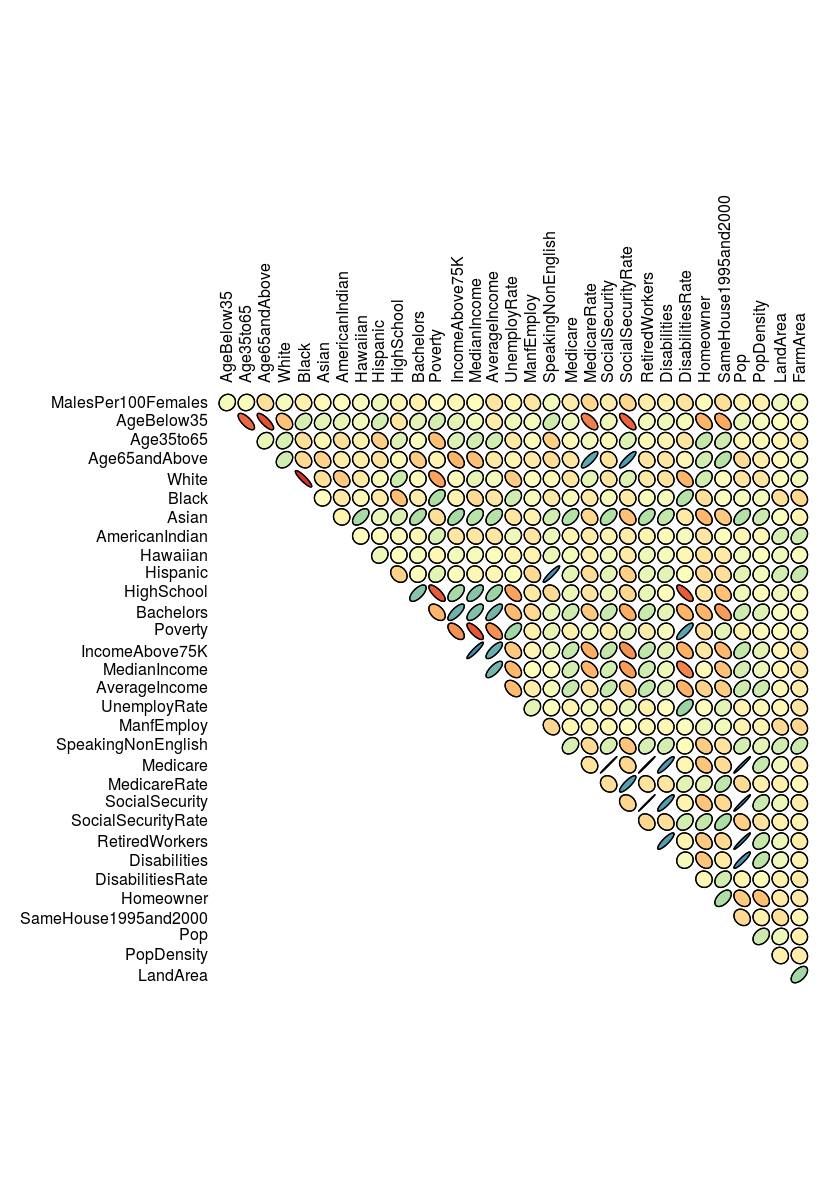

In [209]:

library (ellipse); library (RColorBrewer); options(repr.plot.height=10)
my_colors=colorRampPalette(brewer.pal(5, "Spectral"))(100)
data=cor(elect.df[,c(10:41)], use="complete.obs")

plotcorr(data, col=my_colors[data*50+50], mar=c(0,0,0,0),
        cex.lab=0.8, type="upper", diag=FALSE)
